In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


### Month is still in object data type

In [6]:
df.Month = pd.to_datetime(df.Month,infer_datetime_format=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
df.shape

(144, 2)

In [9]:
df.columns
# Convert Month As an Index

Index(['Month', 'Passengers'], dtype='object')

In [10]:
df = df.set_index('Month')

In [11]:
df.head(5)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
df.shape

(144, 1)

In [12]:
import matplotlib.pyplot as plt

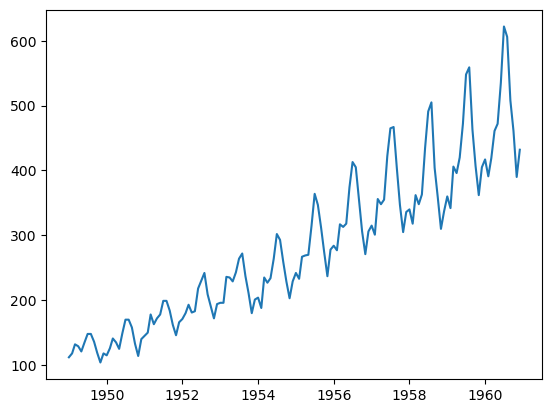

In [13]:
plt.plot(df)

<AxesSubplot:xlabel='Month'>

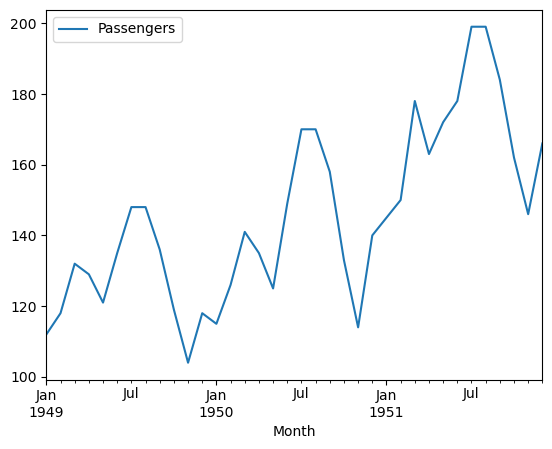

In [14]:
df[0:36].plot()

<AxesSubplot:xlabel='Month'>

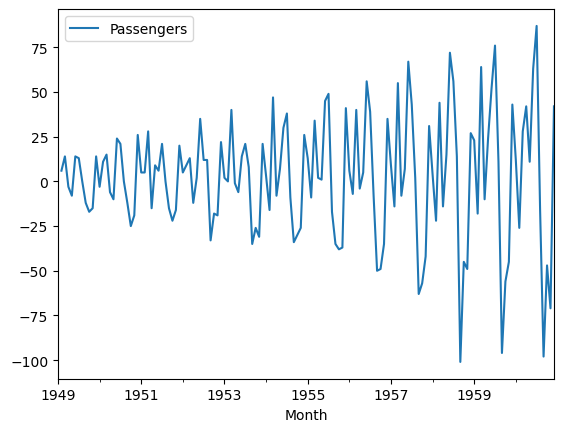

In [15]:
df.diff().plot()
# after level 1 differenceing data not stationary

<AxesSubplot:xlabel='Month'>

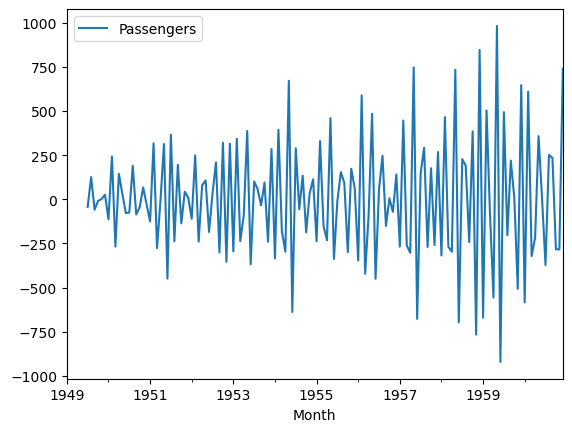

In [16]:
df.diff().diff().diff().diff().diff().diff().plot()

In [17]:
# take a lag
df1 = np.log(df)

<AxesSubplot:xlabel='Month'>

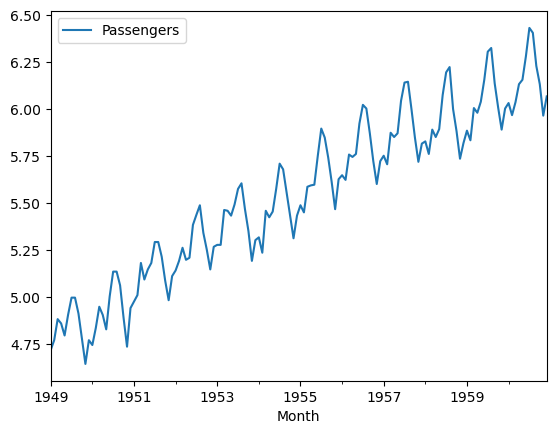

In [18]:
df1.plot()

<AxesSubplot:xlabel='Month'>

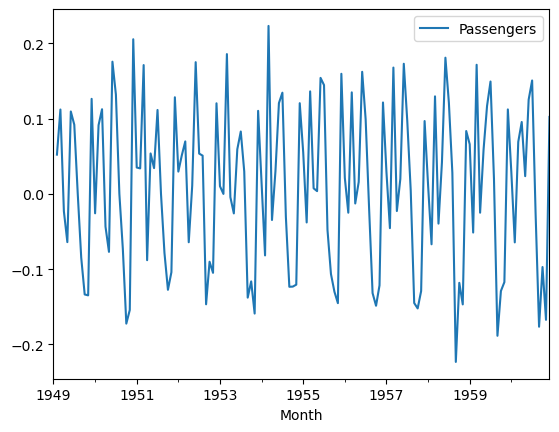

In [19]:
df1.diff().plot()

In [20]:
## to build a model we need to find value of P,Q,D---> D=1
# Now data is log data ...so we need to take antilog
# P? ..Q?  --> ACf, PACF

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

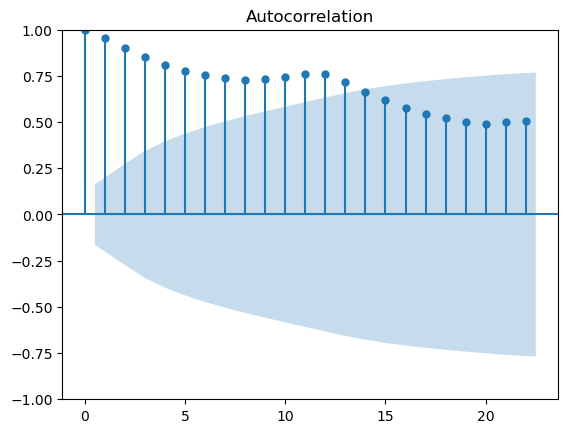

In [22]:
plot_acf(df1);

C:\Users\MR.GODHADE\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


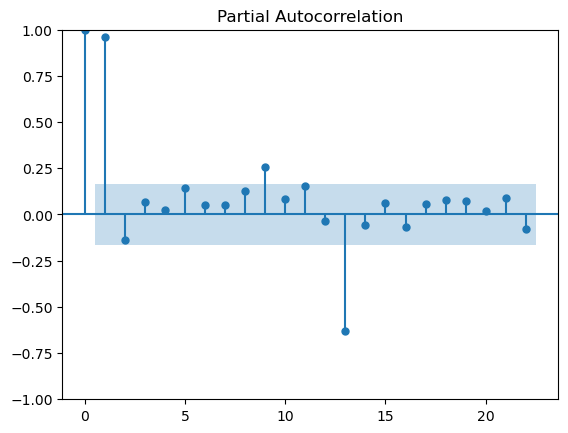

In [23]:
plot_pacf(df1);

In [24]:
from statsmodels.tsa.arima_model import ARIMA

In [25]:
model = ARIMA(df1,order = (2,1,0))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
result = model.fit()

In [ ]:
# SARIMAX - is used with AUTO ARIMA(P,D,Q)
# P,D,Q,X

### ARIMA cant handle Seasonality

### Note : if data in seasonal dont use ARIMA

#### ARIMA can be used for trend but not for Seasonal

## so

### SARIMA is used for seasonal and Trend

____________________________________________________________________________________________

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

In [28]:
pip install pmdarima

     -------------------------------------- 572.7/572.7 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
dec_results = seasonal_decompose(df1)

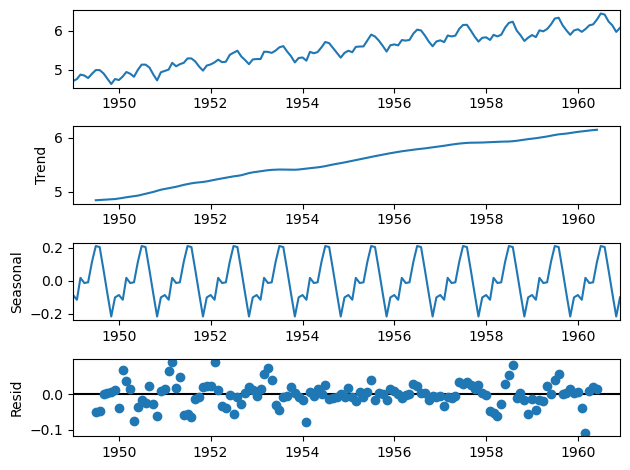

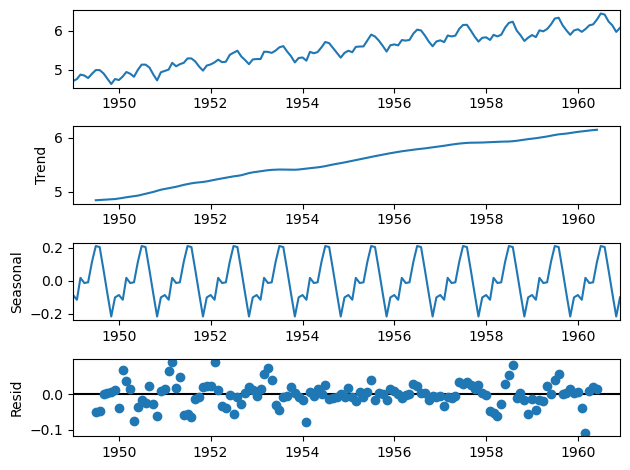

In [31]:
dec_results.plot()
# this is optional

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
auto_arima(df1,seasonal=True,m=12)

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [34]:
model_sarima = SARIMAX(df1,order=(2,0,0), seasonal_order=(0,1,1,12))

In [35]:
result_airpassenger = model_sarima.fit()

In [40]:
pred_log = result_airpassenger.predict(start = 144, end = 156)
#pred_log

In [41]:
pred_actualscale = np.round(np.exp(pred_log))

In [42]:
pred_actualscale

1961-01-01    448.0
1961-02-01    422.0
1961-03-01    475.0
1961-04-01    487.0
1961-05-01    503.0
1961-06-01    576.0
1961-07-01    660.0
1961-08-01    657.0
1961-09-01    549.0
1961-10-01    488.0
1961-11-01    422.0
1961-12-01    467.0
1962-01-01    484.0
Freq: MS, Name: predicted_mean, dtype: float64

### Forecasting

<AxesSubplot:xlabel='Month'>

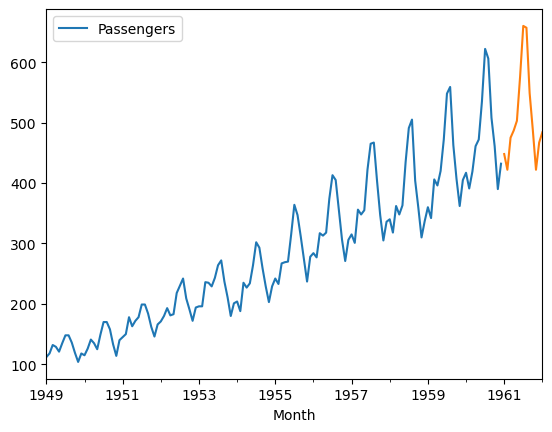

In [46]:
df.plot()  # originoal data
pred_actualscale.plot() # predicted / forcast values


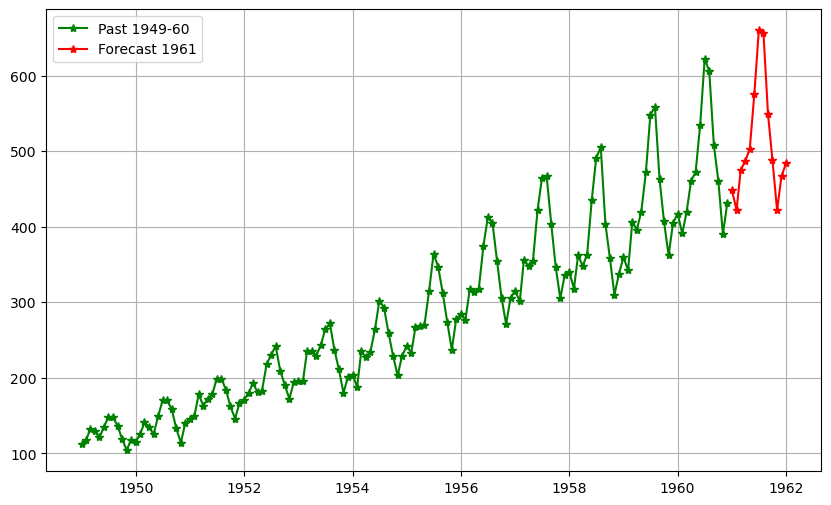

In [47]:
plt.figure(figsize=(10,6))
plt.plot(df.Passengers, marker = "*",color = "green", label = 'Past 1949-60')
plt.plot(pred_actualscale,marker = "*",color = "red", label = 'Forecast 1961')
plt.legend()
plt.grid()

In [48]:
# for validating our model we used the graphs
# using 


In [49]:
df1_train = df1.iloc[0:132]
df1_test = df1.iloc[132:]

### Auto arima should be executed not on TRAIN  but on full data

In [50]:
model_sarima_train = SARIMAX(df1_train, order = (2,0,0), seasonal_order=(0,1,1,12))

In [51]:
result_airpassenger_train = model_sarima_train.fit()

In [53]:
pred_log_train = result_airpassenger_train.predict(start = 132, end = 144)

pred_log_train_actual_scale = np.exp(pred_log_train) # 1960

In [54]:
# mse, rmse, mape

In [55]:
err = (df.iloc[132:].Passengers - pred_log_train_actual_scale)

In [57]:
np.mean(np.abs(err*100/(df.iloc[132:].Passengers)))

2.6007093396213037

In [58]:
pred_actual_df = pd.DataFrame()

In [59]:
pred_actual_df['Actual'] = df.iloc[132:].Passengers
pred_actual_df['Pred'] = np.round(pred_log_train_actual_scale)

<AxesSubplot:xlabel='Month'>

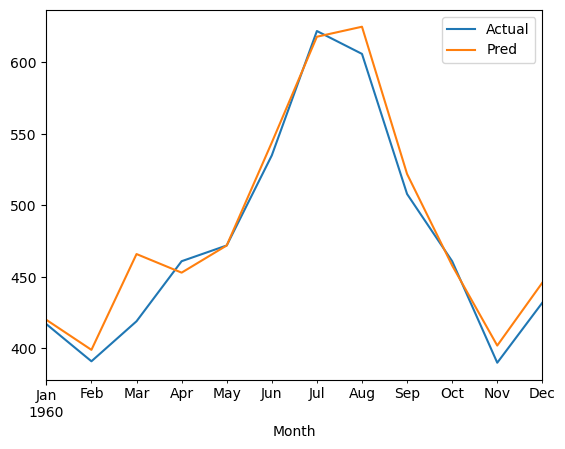

In [61]:
pred_actual_df.plot()